Goal is to create a model that will forecast the next 5 years of energy generation for Germany.

I will be using the darts package for the time-series forecasting and then doing an ensemble forecast that will used various different models this will also ensure that we can do back testing. I am also following the code along from the quick start-up as well as the example code along from the N-BEATS dococumentation

I will also be using a training ratio of 70 to 30 on the data, 70% to train, 30% to test and validate the model, so we can then forecsat 5 years and then 10 years out.

In [ ]:
pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.6/354.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.7/280.7 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [ ]:
Step 1 download the packages and prepare the data.

In [ ]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 54.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from darts import TimeSeries

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import MissingValuesFiller, Scaler
from darts.datasets import EnergyDataset
from darts.metrics import r2_score
from darts.models import NBEATSModel
from darts.utils.callbacks import TFMProgressBar

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)


def generate_torch_kwargs():
    # run torch models on CPU, and disable progress bars for all model stages except training.
    return {
        "pl_trainer_kwargs": {
            "accelerator": "cpu",
            "callbacks": [TFMProgressBar(enable_train_bar_only=True)],
        }
    }


In [ ]:
url = "Your Data from google drive"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
combinded_data = pd.read_csv(path, parse_dates=True,index_col= ['date_of_energy_records'])

In [ ]:
combinded_data = combinded_data.reset_index()
combinded_data = combinded_data.drop(axis=0, columns = 'Unnamed: 0').copy()
combinded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13784 entries, 0 to 13783
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   date_of_energy_records                             13784 non-null  datetime64[ns]
 1   energy_id                                          13784 non-null  int64         
 2   city                                               13784 non-null  object        
 3   country_name                                       13784 non-null  object        
 4   avg_temp                                           13784 non-null  float64       
 5   min_temp                                           13784 non-null  float64       
 6   max_temp                                           13784 non-null  float64       
 7   max_windspeed                                      13784 non-null  float64       
 8   avg_windspeed   

In [ ]:
germany_data = combinded_data.copy()

In [ ]:
germany_data

,date_of_energy_records,energy_id,city,country_name,avg_temp,min_temp,max_temp,max_windspeed,avg_windspeed,avg_cloudcover,...,Natural Gas,Not Specified,Nuclear,Oil and Petroleum Products,Other Combustible Non-Renewables,Other Renewables,Solar,Total Combustible Fuels,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Wind
0,2010-01-01,17,Berlin,Germany,-5.02581,-19.0,2.0,50.0,23.2742,79.2516,...,0.00,0.0,0.0,0.000,443.323,0.0,0.0,0.0,0.0,0.00
1,2010-01-01,18,Berlin,Germany,-5.02581,-19.0,2.0,50.0,23.2742,79.2516,...,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.00
2,2010-01-01,19,Berlin,Germany,-5.02581,-19.0,2.0,50.0,23.2742,79.2516,...,8936.58,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.00
3,2010-01-01,20,Berlin,Germany,-5.02581,-19.0,2.0,50.0,23.2742,79.2516,...,0.00,0.0,0.0,1016.590,0.000,0.0,0.0,0.0,0.0,0.00
4,2010-01-01,21,Berlin,Germany,-5.02581,-19.0,2.0,50.0,23.2742,79.2516,...,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,2906.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13779,2024-12-01,49617,Munich,Germany,1.78710,-7.9,12.2,37.7,15.8903,70.8484,...,8633.13,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.00
13780,2024-12-01,49618,Munich,Germany,1.78710,-7.9,12.2,37.7,15.8903,70.8484,...,0.00,0.0,0.0,435.188,0.000,0.0,0.0,0.0,0.0,0.00
13781,2024-12-01,49619,Munich,Germany,1.78710,-7.9,12.2,37.7,15.8903,70.8484,...,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.00
13782,2024-12-01,49620,Munich,Germany,1.78710,-7.9,12.2,37.7,15.8903,70.8484,...,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.00


In [ ]:
germany_data['date_of_energy_records'] = pd.to_datetime(
    germany_data['date_of_energy_records'],
    errors='raise'
)


germany_data['date_of_energy_records'] = (
    germany_data['date_of_energy_records']
        .dt.to_period('M')
        .dt.to_timestamp()              # default is month start
)

In [ ]:
germany_data['date_of_energy_records'].dt.day.unique()


array([1], dtype=int32)

In [ ]:
variables = [
    'avg_temp',
    'min_temp',
    'max_windspeed',
    'avg_windspeed',
    'avg_cloudcover',
    'total_precip',
    'population',
]

In [ ]:
capital_city_mask = germany_data['city'] == 'Berlin'
electricity_capitals= germany_data.loc[capital_city_mask, :]
electricity_capitals = electricity_capitals.drop(axis = 0 , columns = 'energy_id')

In [ ]:

energy_cols = [
   'Coal, Peat and Manufactured Gases',
                                        'Natural Gas',
                                        'Nuclear',
                                        'Oil and Petroleum Products',
                                        'Other Combustible Non-Renewables',
                                        'Total Combustible Fuels',
                                        'Combustible Renewables','Other Renewables','Geothermal',
                                        'Hydro',
                                        'Solar',
                                        'Wind',
                                        'Total Renewables (Hydro, Geo, Solar, Wind, Other)','Not Specified']


fuel_cols = [
   'Coal, Peat and Manufactured Gases',
                                        'Natural Gas',
                                        'Nuclear',
                                        'Oil and Petroleum Products',
                                        'Other Combustible Non-Renewables',
                                        'Total Combustible Fuels',
                                        'Combustible Renewables',
                                        ]


Renewables_cols = ['Other Renewables','Geothermal',
                                        'Hydro',
                                        'Solar',
                                        'Wind',
                                        'Total Renewables (Hydro, Geo, Solar, Wind, Other)','Not Specified']

energy_agg = electricity_capitals.groupby("date_of_energy_records")[energy_cols].sum()
energy_agg

,"Coal, Peat and Manufactured Gases",Natural Gas,Nuclear,Oil and Petroleum Products,Other Combustible Non-Renewables,Total Combustible Fuels,Combustible Renewables,Other Renewables,Geothermal,Hydro,Solar,Wind,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Not Specified
date_of_energy_records,,,,,,,,,,,,,,
2010-01-01,25193.50,8936.58,12537.3,1016.590,443.323,37957.5,2367.57,0.0,2.1230,2078.53,423.832,2906.48,7778.54,158.1850
2010-02-01,22534.90,8251.20,11010.0,843.429,417.701,34278.0,2230.74,0.0,2.0860,1780.05,533.211,3695.59,8241.67,151.5300
2010-03-01,22226.30,8290.43,11649.0,670.619,452.608,34057.1,2417.16,0.0,2.1690,2202.39,1026.950,4901.15,10549.80,174.7440
2010-04-01,20595.50,7170.87,10100.6,514.483,477.884,31310.9,2552.15,0.0,1.7830,1946.79,1366.060,3145.06,9011.85,141.5750
2010-05-01,19684.20,6144.46,10644.3,683.582,517.766,29795.1,2765.14,0.0,1.6830,2298.70,1102.000,2692.02,8859.54,140.9620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,7724.90,4872.64,0.0,467.219,536.284,17008.2,3407.17,0.0,8.9677,2368.89,10219.500,6442.12,22446.70,117.8420
2024-09-01,7830.86,4718.39,0.0,446.209,450.500,16681.4,3235.48,0.0,11.2097,2339.86,7154.670,10455.10,23196.30,83.2539
2024-10-01,10707.20,5832.14,0.0,476.299,481.113,21076.5,3579.78,0.0,13.4516,2485.21,4086.800,10291.50,20456.70,103.9430


In [ ]:
electricity_capitals_1 = electricity_capitals.drop(axis = 0, columns = energy_cols)
electricity_capitals_1 = electricity_capitals_1.drop_duplicates()
electricity_capitals_1.duplicated().sum()
modeling_data = electricity_capitals_1.merge(energy_agg, on = ['date_of_energy_records'], how = 'left')




In [ ]:
modeling_data['date'] = modeling_data['date_of_energy_records']

In [ ]:

modeling_data['date'] = pd.to_datetime(
    modeling_data['date'],
    errors="raise"       # raise error if anything invalid
)

modeling_data['date'] = (
   modeling_data['date']
        .dt.to_period('M')
        .dt.to_timestamp()              # default is month start
)

In [ ]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   date_of_energy_records                             180 non-null    datetime64[ns]
 1   city                                               180 non-null    object        
 2   country_name                                       180 non-null    object        
 3   avg_temp                                           180 non-null    float64       
 4   min_temp                                           180 non-null    float64       
 5   max_temp                                           180 non-null    float64       
 6   max_windspeed                                      180 non-null    float64       
 7   avg_windspeed                                      180 non-null    float64       
 8   avg_cloudcover      

In [ ]:
modeling_data = modeling_data.drop(axis = 0,columns ='date_of_energy_records')


In [ ]:
modeling_data['date'] = pd.to_datetime(modeling_data['date'])

tot_comb = modeling_data.set_index('date')[['Total Combustible Fuels']]
tot_comb=tot_comb.reset_index()

In [ ]:
modeling_data['date'] = pd.to_datetime(modeling_data['date'])

tot_rene = modeling_data.set_index('date')[['Total Renewables (Hydro, Geo, Solar, Wind, Other)']]
tot_rene=tot_rene.reset_index()

In [ ]:
tot_com = TimeSeries.from_dataframe(     # I should split on the specific target
    tot_comb.reset_index(),
    time_col="date",
    value_cols='Total Combustible Fuels',   # targets
    static_covariates=None,
)

tot_ren = TimeSeries.from_dataframe(
    tot_rene.reset_index(),
    time_col="date",
    value_cols='Total Renewables (Hydro, Geo, Solar, Wind, Other)',   # targets
    static_covariates=None,
)

weather_population_covar = TimeSeries.from_dataframe(
    modeling_data.reset_index(),
    time_col="date",
    value_cols=variables,   # targets
    static_covariates=None,
)

In [ ]:
tot_com

,Total Combustible Fuels
date,
2010-01-01,37957.5
2010-02-01,34278.0
2010-03-01,34057.1
2010-04-01,31310.9
2010-05-01,29795.1
...,...
2024-08-01,17008.2
2024-09-01,16681.4
2024-10-01,21076.5


In [ ]:
tot_ren

,"Total Renewables (Hydro, Geo, Solar, Wind, Other)"
date,
2010-01-01,7778.54
2010-02-01,8241.67
2010-03-01,10549.80
2010-04-01,9011.85
2010-05-01,8859.54
...,...
2024-08-01,22446.70
2024-09-01,23196.30
2024-10-01,20456.70


We want to use N-BEATS model for energy forecasting so we will use scaling that makes our energy output values into a format that is easier to read for nueral netowrk.s

In [ ]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(f"R2: {r2_score(ts_transformed.univariate_component(0), pred_series)}")
    plt.legend()

In [ ]:
train_com, val_com = tot_com.split_after(0.9)
train_ren, val_ren = tot_ren.split_after(0.9)

Text(0.5, 1.0, 'Monthly Combustion Fuel Energy Production')

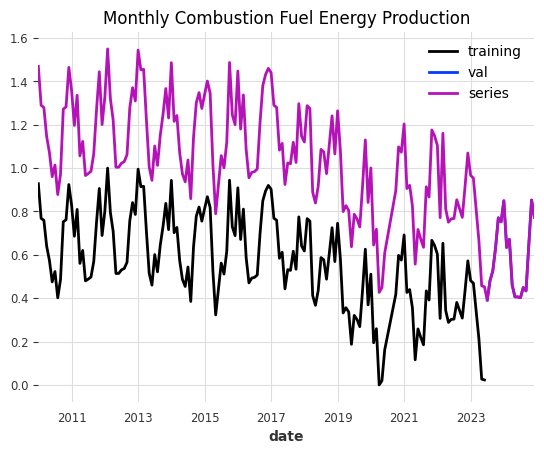

In [ ]:

filler = MissingValuesFiller()
scaler = Scaler()

train_scaled_com = scaler.fit_transform(train_com)
train_scaled_ren = scaler.fit_transform(train_ren)
val_scaled_com = scaler.transform(val_com)
val_scaled_ren = scaler.transform(val_ren)
tot_com_scaled = scaler.transform(tot_com)
tot_ren_scaled = scaler.transform(tot_ren)


train_scaled_com.plot(label="training")
val_scaled_com.plot(label="val")
tot_com_scaled.plot(label ='series')
plt.title("Monthly Combustion Fuel Energy Production")

In the following you will only see 2 models tested out, but this is because I tested many but had to make a few new ones.

In [ ]:
model_name = "nbeats_interpretable_run"
combustion_model3 = NBEATSModel(
    input_chunk_length=12,
    output_chunk_length=6,
    generic_architecture=False,
    num_blocks=3,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    random_state=42,
    model_name=model_name,
    save_checkpoints=True,
    force_reset=True,
    **generate_torch_kwargs(),
 )

In [ ]:
#Renewables model
model_name = "nbeats_interpretable_run"
renewables_model3 = NBEATSModel(
    input_chunk_length=12,
    output_chunk_length=6,
    generic_architecture=False,
    num_blocks=3,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    random_state=42,
    model_name='Renewable_model',
    save_checkpoints=True,
    force_reset=True,
    **generate_torch_kwargs(),
 )

In [ ]:
# model_nbeats.fit(train_com, val_series=val_com)


# weather_population_covar

combustion_model3.fit(train_com,
    val_series=val_com,
)

Training: 0it [00:00, ?it/s]

NBEATSModel(output_chunk_shift=0, generic_architecture=False, num_stacks=30, num_blocks=3, num_layers=4, layer_widths=512, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=12, output_chunk_length=6, n_epochs=100, nr_epochs_val_period=1, batch_size=800, random_state=42, model_name=nbeats_interpretable_run, save_checkpoints=True, force_reset=True, pl_trainer_kwargs={'accelerator': 'cpu', 'callbacks': [<darts.utils.callbacks.TFMProgressBar object at 0x79a84c955c70>]})

In [ ]:
renewables_model3.fit(train_ren,
    val_series=val_ren,
)

Training: 0it [00:00, ?it/s]

NBEATSModel(output_chunk_shift=0, generic_architecture=False, num_stacks=30, num_blocks=3, num_layers=4, layer_widths=512, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=12, output_chunk_length=6, n_epochs=100, nr_epochs_val_period=1, batch_size=800, random_state=42, model_name=Renewable_model, save_checkpoints=True, force_reset=True, pl_trainer_kwargs={'accelerator': 'cpu', 'callbacks': [<darts.utils.callbacks.TFMProgressBar object at 0x79a84c956930>]})

In [ ]:
model_nbeats_com3 = NBEATSModel.load_from_checkpoint(model_name=model_name, best=True)
model_nbeats_ren3 = NBEATSModel.load_from_checkpoint(model_name='Renewable_model', best=True)


#forecast = model_nbeats.predict(len(val_energy_re_sc))

In [ ]:
pred_series_com = model_nbeats_com3.historical_forecasts(
    tot_com,
    start=val_com.start_time(),
    forecast_horizon=12,
    stride=12,
    last_points_only=False,
    retrain=False,
    verbose=True,
)
pred_series_com = concatenate(pred_series_com)

Generating TimeSeries: 100%|██████████| 1/1 [00:00<00:00, 1022.50it/s]


In [ ]:
pred_series_ren = model_nbeats_ren3.historical_forecasts(
    tot_ren,
    start=val_ren.start_time(),
    forecast_horizon=12,
    stride=12,
    last_points_only=False,
    retrain=False,
    verbose=True,
)
pred_series_ren = concatenate(pred_series_ren)

Generating TimeSeries: 100%|██████████| 1/1 [00:00<00:00, 899.10it/s]


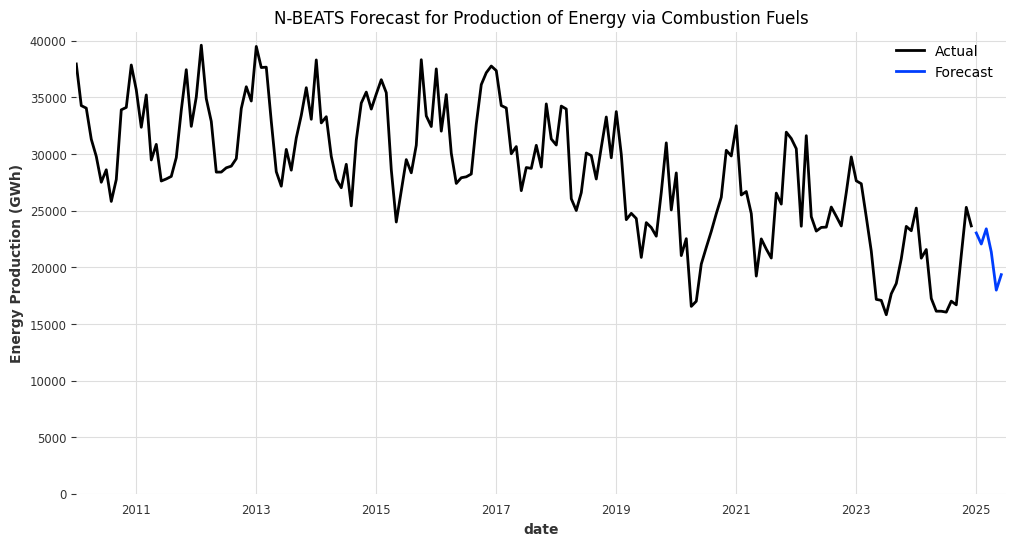

In [ ]:
# from darts.models import NBEATSModel
# import matplotlib.pyplot as plt

# tot_com_scaled is your training series
# model_nbeats is already trained

forecast_com = model_nbeats_com3.predict(
    n=6,                 # forecast horizon
    series=tot_com,
)

# Plot
plt.figure(figsize=(12, 6))
tot_com.plot(label="Actual")
forecast_com.plot(label="Forecast")
plt.title("N-BEATS Forecast for Production of Energy via Combustion Fuels")
plt.legend()
plt.ylim(bottom=0)   # y-axis starts at 0
plt.ylabel("Energy Production (GWh)")
# Ensure full forecast range is shown
plt.xlim(tot_com.start_time(), forecast_com.end_time() + forecast_com.freq)
plt.show()


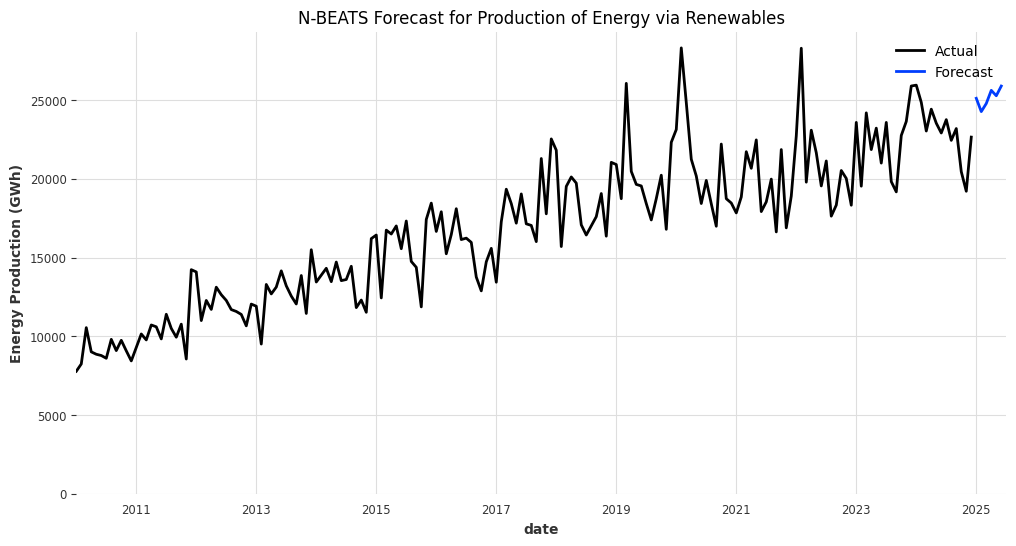

In [ ]:
forecast_ren = renewables_model3.predict(
    n=6,                 # forecast horizon
    series=tot_ren,
)

# Plot
plt.figure(figsize=(12, 6))
tot_ren.plot(label="Actual")
forecast_ren.plot(label="Forecast")
plt.title("N-BEATS Forecast for Production of Energy via Renewables")
plt.legend()
plt.ylim(bottom=0)

plt.ylabel("Energy Production (GWh)")   # y-axis starts at 0

# Ensure full forecast range is shown
plt.xlim(tot_ren.start_time(), forecast_ren.end_time() + forecast_ren.freq)
plt.show()


Text(0, 0.5, 'Energy Production (GWh)')

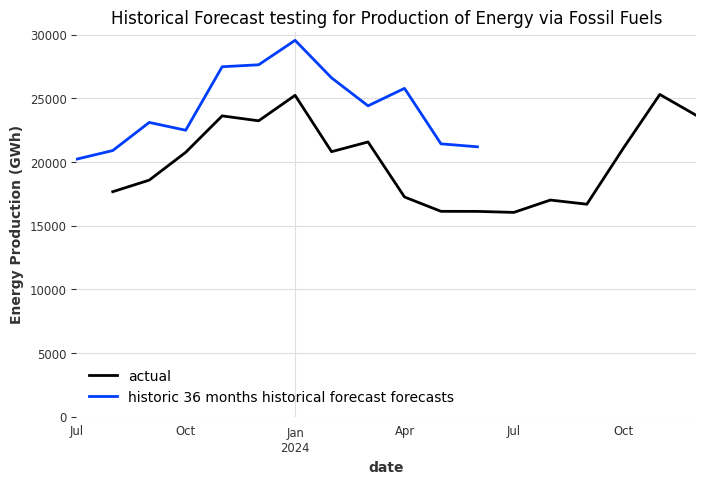

In [ ]:
display_forecast(
    pred_series_com,
    tot_com,
    "36 months historical forecast",
    start_date=val_com.start_time(),
)
plt.legend()
plt.ylim(bottom=0)
plt.title("Historical Forecast testing for Production of Energy via Fossil Fuels")
plt.ylabel("Energy Production (GWh)")

Text(0, 0.5, 'Energy Production (GWh)')

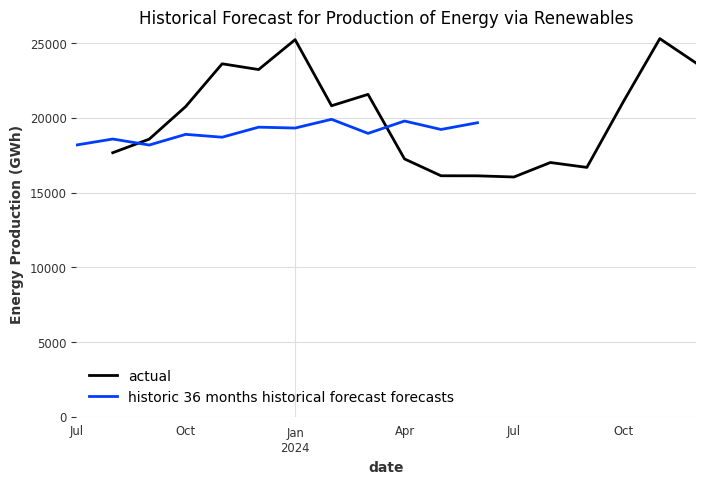

In [ ]:
display_forecast(
    pred_series_ren,
    tot_com,
    "36 months historical forecast",
    start_date=val_ren.start_time(),
)
plt.legend()
plt.ylim(bottom=0)
plt.title("Historical Forecast for Production of Energy via Renewables")

plt.ylabel("Energy Production (GWh)")

In [ ]:
from darts.metrics import mape

from darts.metrics import mape

print(
    f"Mean absolute percentage error for the combined naive drift + seasonal: {mape(tot_com,
forecast_com):.2f}%."
)

Mean absolute percentage error for the combined naive drift + seasonal: nan%.


In [ ]:
val_com

,Total Combustible Fuels
date,
2020-07-01,21754.0
2020-08-01,23172.3
2020-09-01,24733.8
2020-10-01,26186.1
2020-11-01,30334.8
...,...
2024-08-01,17008.2
2024-09-01,16681.4
2024-10-01,21076.5


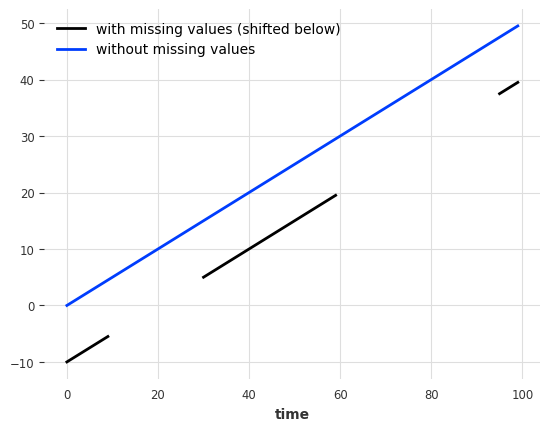

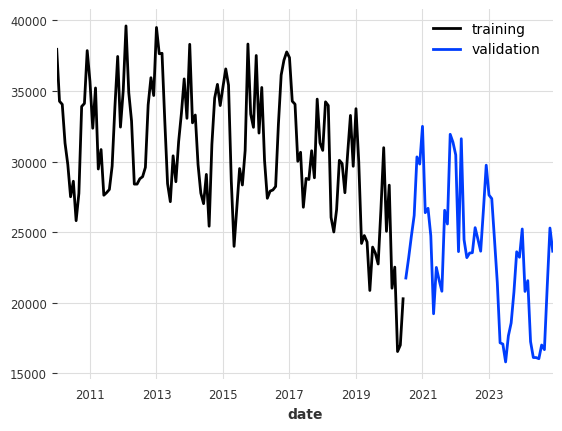

In [ ]:
# = series.split_before(pd.Timestamp("19580101"))
train_com.plot(label="training")
val_com.plot(label="validation");


# train_com, val_com
# train_ren, val_ren

In [ ]:
print(total_combustion.time_index)

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', name='date', length=180, freq='MS')


In [ ]:

train_com


,Total Combustible Fuels
date,
2010-01-01,37957.5
2010-02-01,34278.0
2010-03-01,34057.1
2010-04-01,31310.9
2010-05-01,29795.1
...,...
2020-02-01,21032.6
2020-03-01,22526.6
2020-04-01,16546.1


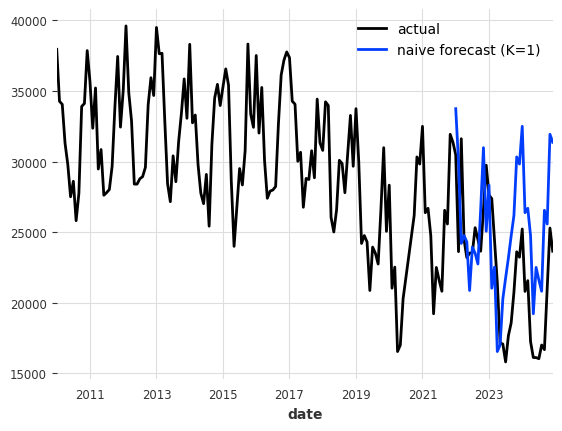

In [ ]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=36)
naive_model.fit(train_com)
naive_forecast = naive_model.predict(36)

tot_com.plot(label="actual"),
naive_forecast.plot(label="naive forecast (K=1)");


# train_com, val_com
# train_ren, val_ren

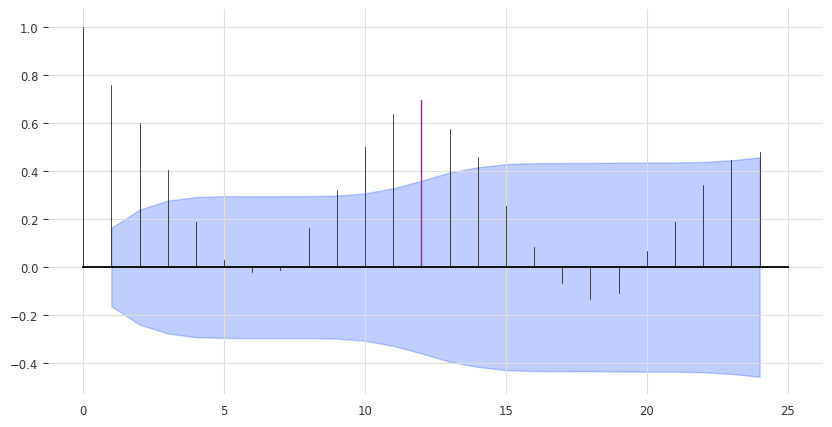

In [ ]:
from darts.utils.statistics import check_seasonality, plot_acf

plot_acf(train_com, m=12, alpha=0.05, max_lag=24)

In [ ]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train_com, m=m, alpha=0.05)
    if is_seasonal:
        print(f"There is seasonality of order {period}.")

There is seasonality of order 12.


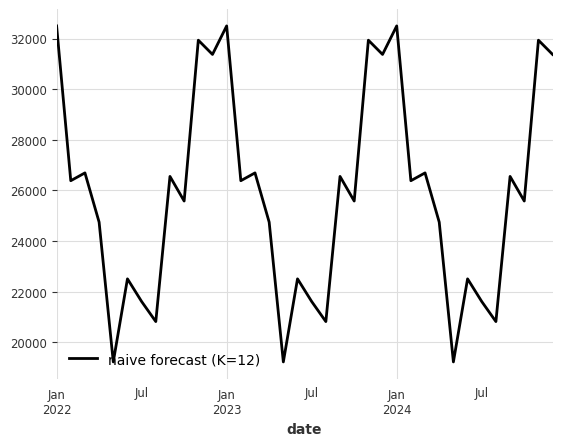

In [ ]:
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train_com)
seasonal_forecast = seasonal_model.predict(36)

#total_combustion.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=12)");

In [ ]:
val_com

,Total Combustible Fuels
date,
2020-07-01,21754.0
2020-08-01,23172.3
2020-09-01,24733.8
2020-10-01,26186.1
2020-11-01,30334.8
...,...
2024-08-01,17008.2
2024-09-01,16681.4
2024-10-01,21076.5


<Axes: xlabel='date'>

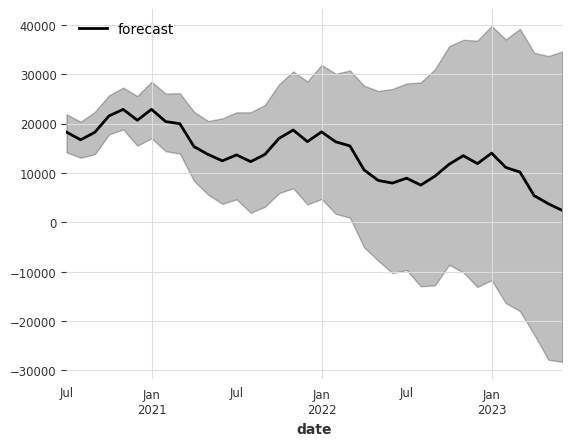

In [ ]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train_com)
pred = model.predict(n=36, num_samples=500)

#total_combustion.plot()
pred.plot(label='forecast')

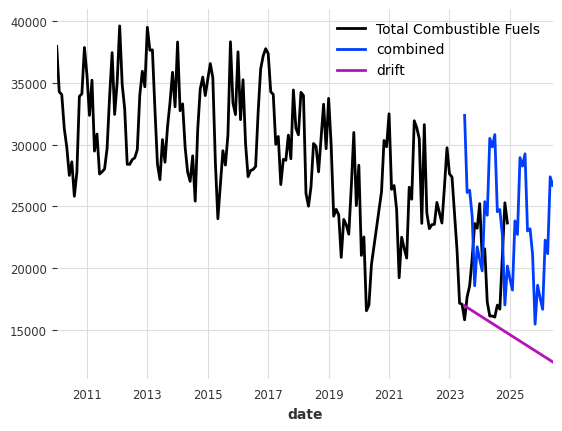

In [ ]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train_com)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train_com.last_value()

tot_com.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift");

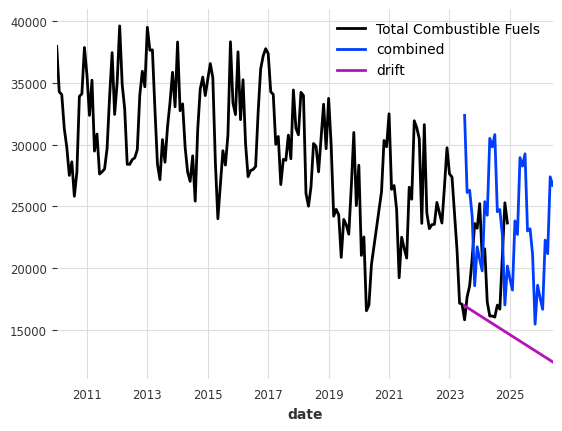

In [ ]:
drift_model = NaiveDrift()
drift_model.fit(train_com)
drift_forecast = drift_model.predict(36)

combined_forecast = drift_forecast + seasonal_forecast - train_com.last_value()

tot_com.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift");

In [ ]:
from darts.metrics import mape

print(
    f"Mean absolute percentage error for the combined naive drift + seasonal: {mape(tot_com, combined_forecast):.2f}%."
)

Mean absolute percentage error for the combined naive drift + seasonal: nan%.


In [ ]:
from darts.models import AutoARIMA, ExponentialSmoothing, Theta


def eval_model(model):
    model.fit(train_com)
    forecast = model.predict(len(val_com))
    print(f"model {model} obtains MAPE: {mape(val_com, forecast):.2f}%")


eval_model(ExponentialSmoothing())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing() obtains MAPE: 10.54%
model AutoARIMA() obtains MAPE: 17.12%
model Theta() obtains MAPE: 10.14%


In [ ]:
# Search for the best theta parameter, by trying 50 different values
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train_com)
    pred_theta = model.predict(len(val_com))
    res = mape(val_com, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [ ]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train_com)
pred_best_theta = best_theta_model.predict(len(val_com))

print(f"Lowest MAPE is: {mape(val_ren, pred_best_theta):.2f}, with theta = {best_theta}.")

Lowest MAPE is: 13.90, with theta = -0.6530612244897966.


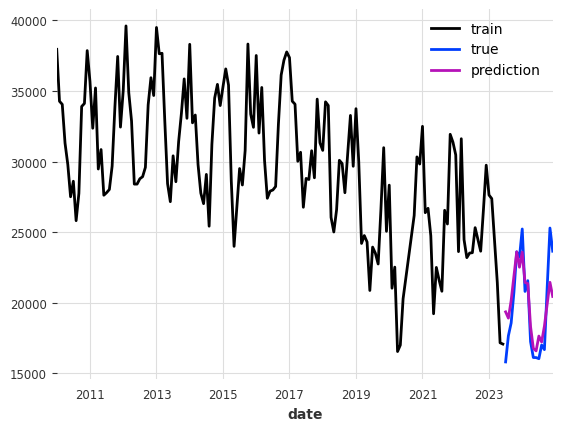

In [ ]:
train_com.plot(label="train")
val_com.plot(label="true")
pred_best_theta.plot(label="prediction");

historical forecasts: 100%|██████████| 175/175 [00:03<00:00, 53.27it/s]


MAPE = 11.15%


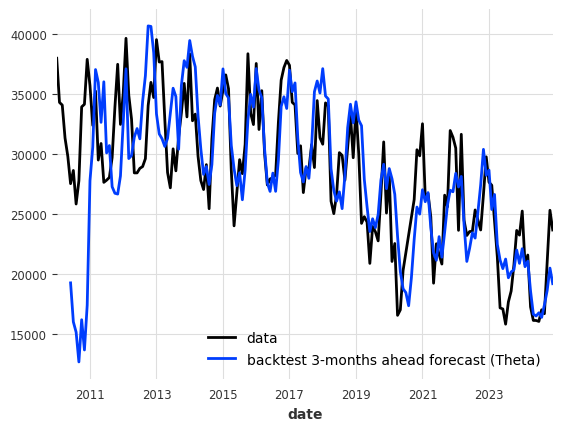

In [ ]:
hfc_params = {
    "series": tot_com,
    "start": pd.Timestamp(
        "1956-01-01"
    ),  # can also be a float for the fraction of the series to start at
    "forecast_horizon": 3,
    "verbose": True,
}
historical_fcast_theta = best_theta_model.historical_forecasts(
    last_points_only=True, **hfc_params
)

tot_com.plot(label="data")
historical_fcast_theta.plot(label="backtest 3-months ahead forecast (Theta)")
print(f"MAPE = {mape(tot_com, historical_fcast_theta):.2f}%")

historical forecasts: 100%|██████████| 59/59 [00:00<00:00, 93.20it/s]


MAPE = 8.54%


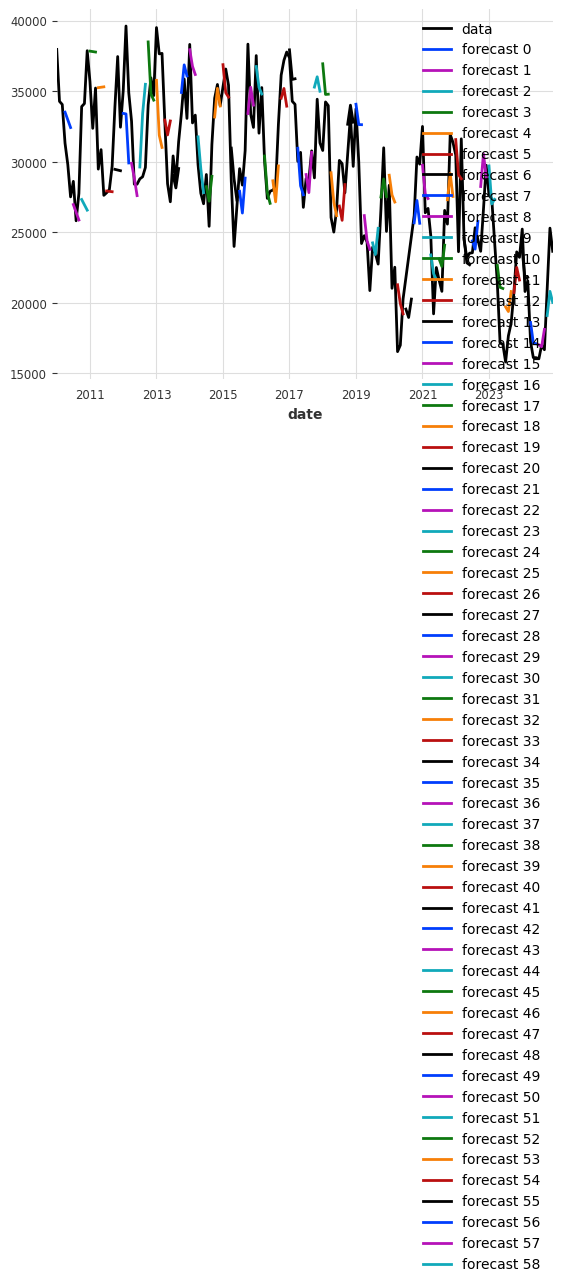

In [ ]:
historical_fcast_theta_all = best_theta_model.historical_forecasts(
    last_points_only=False, stride=3, **hfc_params
)

tot_com.plot(label="data")
for idx, hfc in enumerate(historical_fcast_theta_all):
    hfc.plot(label=f"forecast {idx}")

from darts import concatenate

historical_fcast_theta_all = concatenate(historical_fcast_theta_all, axis=0)
print(f"MAPE = {mape(tot_com, historical_fcast_theta_all):.2f}%")

historical forecasts: 100%|██████████| 175/175 [00:02<00:00, 77.82it/s]


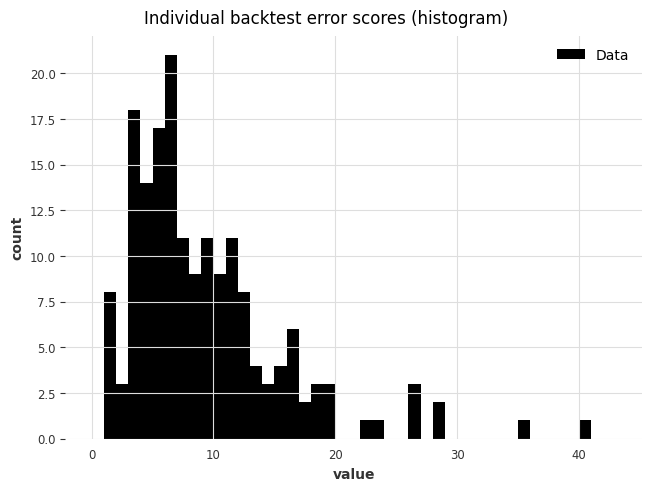

In [ ]:
best_theta_model = Theta(best_theta)

raw_errors = best_theta_model.backtest(
    metric=mape, reduction=None, last_points_only=False, stride=1, **hfc_params
)

from darts.utils.statistics import plot_hist

plot_hist(
    raw_errors,
    bins=np.arange(0, max(raw_errors), 1),
    title="Individual backtest error scores (histogram)",
);

In [ ]:
average_error = best_theta_model.backtest(
    metric=mape,
    reduction=np.mean,  # this is actually the default
    **hfc_params,
)

print(f"Average error (MAPE) over all historical forecasts: {average_error:.2f}")

historical forecasts: 100%|██████████| 175/175 [00:02<00:00, 65.64it/s]


Average error (MAPE) over all historical forecasts: 9.58


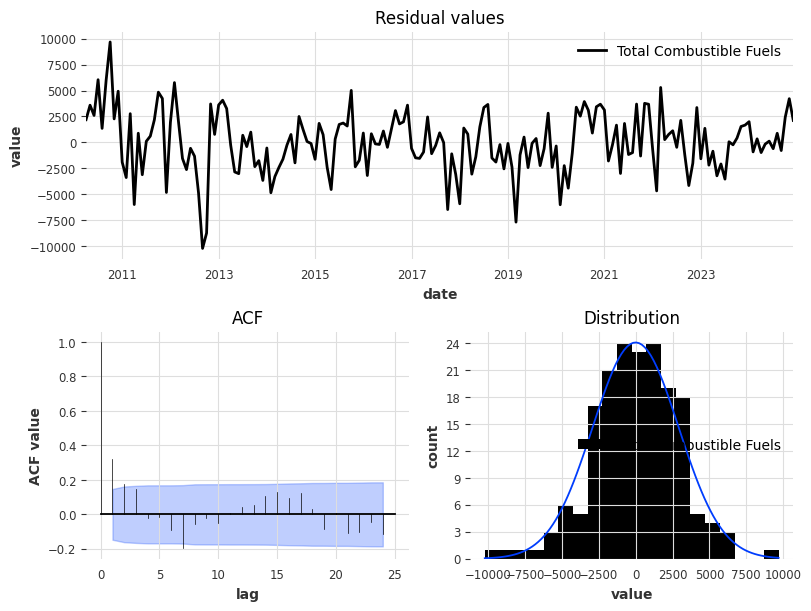

In [ ]:
from darts.utils.statistics import plot_residuals_analysis

plot_residuals_analysis(best_theta_model.residuals(tot_com))

In [ ]:
# total combusition

from darts.models import AutoARIMA, ExponentialSmoothing, Theta


def eval_model(model):
    model.fit(train_com)
    forecast_1 = model.predict(len(val_com))
    print(f"model {model} obtains MAPE: {mape(val_com, forecast_1):.2f}%")


eval_model(ExponentialSmoothing())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing() obtains MAPE: 10.54%
model AutoARIMA() obtains MAPE: 17.12%
model Theta() obtains MAPE: 10.14%


In [ ]:
# total combusition

from darts.models import AutoARIMA, ExponentialSmoothing, Theta


def eval_model(model):
    model.fit(train_com)
    forecast_1 = model.predict(len(val_com))
    print(f"model {model} obtains MAPE: {mape(val_com, forecast_1):.2f}%")


eval_model(ExponentialSmoothing())
eval_model(AutoARIMA())
eval_model(Theta())

model ExponentialSmoothing() obtains MAPE: 55.47%


ImportError: The `StatsForecast` module could not be imported. To enable StatsForecast support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md

In [ ]:
mae # lower is better for mean absolute error

np.float64(0.12005626204190083)

In [ ]:
# investigat into negatives - and replace by zeros becuause the predict is weird.

<Axes: ylabel='Frequency'>

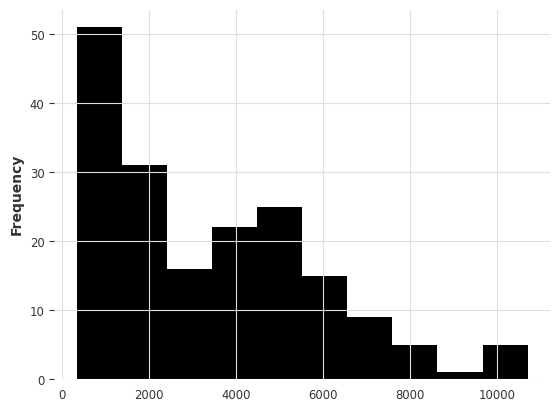

In [ ]:
modeling_data['Solar'].plot(kind='hist')

In [ ]:
pred_series = model_nbeats.historical_forecasts(
    energy_re,
    start=val_energy_re_sc.start_time(),
    forecast_horizon=2,
    stride=2,
    last_points_only=False,
    retrain=False,
    verbose=True,
)
pred_series = concatenate(pred_series)

Generating TimeSeries: 100%|██████████| 1/1 [00:00<00:00, 1689.89it/s]


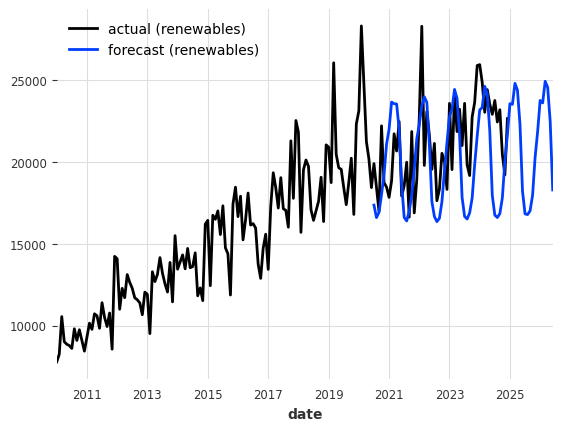

In [ ]:
tot_ren.plot(label="actual (renewables)")
pred_ren.plot(label="forecast (renewables)");